In [60]:
import re
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
steam_data_path = r'F:\DataSpell\Pandas_training\Games_analysis\data_sets\merged_data.csv'

In [3]:
steam_data = pd.read_csv(steam_data_path).dropna(how='all')
steam_data

,Title,Original Price,Discounted Price,Release Date,Link,Game Description,Recent Reviews Summary,All Reviews Summary,Recent Reviews Number,All Reviews Number,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Minimum Requirements
0,Baldur's Gate 3,$29.99,$29.99,"3 Aug, 2023",https://store.steampowered.com/app/1086940/Bal...,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,Very Positive,"- 96% of the 128,900 user reviews in the last ...","- 94% of the 188,617 user reviews for this gam...",Larian Studios,Larian Studios,"['English', 'French', 'German', 'Spanish - Spa...","['RPG', 'Choices Matter', 'Character Customiza...","['Single-player', 'Online Co-op', 'LAN Co-op',...",Requires a 64-bit processor and operating syst...
1,Counter-Strike: Global Offensive,$14.99,$14.99,"21 Aug, 2012",https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,Very Positive,"- 89% of the 75,284 user reviews in the last 3...","- 88% of the 7,428,921 user reviews for this g...","Valve, Hidden Path Entertainment",Valve,"['English', 'Czech', 'Danish', 'Dutch', 'Finni...","['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['Steam Achievements', 'Full controller suppor...",OS: | Windows® 7/Vista/XP | Processor: | Int...
2,Apex Legends™,Free,Free,"4 Nov, 2020",https://store.steampowered.com/app/1172470/Ape...,"Apex Legends is the award-winning, free-to-pla...",Mixed,Very Positive,"- 65% of the 18,581 user reviews in the last 3...","- 80% of the 701,597 user reviews for this gam...",Respawn Entertainment,Electronic Arts,"['English', 'French', 'Italian', 'German', 'Sp...","['Free to Play', 'Multiplayer', 'Battle Royale...","['Online PvP', 'Online Co-op', 'Steam Achievem...",Requires a 64-bit processor and operating syst...
3,Forza Horizon 5,$34.78,$17.39,"8 Nov, 2021",https://store.steampowered.com/app/1551360/For...,Your Ultimate Horizon Adventure awaits! Explor...,Very Positive,Very Positive,"- 87% of the 4,120 user reviews in the last 30...","- 88% of the 123,162 user reviews for this gam...",Playground Games,Xbox Game Studios,"['English', 'French', 'Italian', 'German', 'Sp...","['Racing', 'Open World', 'Driving', 'Multiplay...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...
4,Call of Duty®,Free,Free,"27 Oct, 2022",https://store.steampowered.com/app/1938090/Cal...,"Welcome to Call of Duty® HQ, the home of Call ...",Mixed,Mixed,"- 49% of the 8,257 user reviews in the last 30...","- 57% of the 236,876 user reviews for this gam...","Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"['English', 'French', 'Italian', 'German', 'Sp...","['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71695,The Front,Free,Free,To be announced,https://store.steampowered.com/app/2285150/The...,The Front is a survival-open-world-crafting (S...,NaN,NaN,NaN,NaN,Samar Studio,Samar Studio,"['English', 'French', 'German', 'Russian', 'Ja...","['Early Access', 'Survival', 'Building', 'Sand...","['Single-player', 'MMO', 'Online PvP', 'LAN Pv...",OS: | Requires a 64-bit processor and operati...
71696,The Bornless,Free,Free,To be announced,https://store.steampowered.com/app/2411280/The...,"Welcome to The Bornless, an action horror FPS....",NaN,NaN,NaN,NaN,Cathedral Studios,Cathedral Studios,"['English', 'French', 'Italian', 'German', 'Sp...","['Early Access', 'Horror', 'FPS', 'Shooter', '...","['Single-player', 'Online PvP', 'Online Co-op'...",OS: | Windows 10 or higher | Processor: | In...
71697,Winter Memories,Free,Free,Coming soon,https://store.steampowered.com/app/2495450/Win...,After the unforgettable summer memories you’ve...,NaN,NaN,NaN,NaN,Dojin Otome,Kagura Games,"['English', 'Japanese', 'Simplified Chinese']","['Casual', 'RPG', 'Simulation', 'Sex

# Convert data types

In [4]:
steam_data['Original Price'] = (steam_data['Original Price'].str.replace('Free', '0').str.replace('$', '').str.replace
                              (',','').astype(float))
steam_data['Discounted Price'] = (steam_data['Discounted Price'].str.replace('Free', '0').str.replace('$', '').str
                                .replace(',','').astype(float))


# Convert to datetime

In [5]:
# Convert 'Release Date' column to datetime, letting pandas infer the date format
steam_data['Release Date'] = pd.to_datetime(steam_data['Release Date'], errors='coerce', dayfirst=True)

# Display the first few rows to verify the conversion and see how NaT values are handled
steam_data['Release Date'].head(), steam_data['Release Date'].isnull().sum()

(0   2023-08-03
 1   2012-08-21
 2   2020-11-04
 3   2021-11-08
 4   2022-10-27
 Name: Release Date, dtype: datetime64[ns],
 10308)

# FIx missing values

In [6]:
steam_data['Game Description'] = steam_data['Game Description'].fillna('No description available')
steam_data['Recent Reviews Summary'] = steam_data['Recent Reviews Summary'].fillna('No reviews').astype('category')
steam_data['All Reviews Summary'] = steam_data['All Reviews Summary'].fillna('No reviews').astype('category')
steam_data['Recent Reviews Number'] = steam_data['Recent Reviews Number'].fillna('No recent reviews')
steam_data['All Reviews Number'] = steam_data['All Reviews Number'].fillna('No reviews')
steam_data['Publisher'] = steam_data['Publisher'].fillna('Unknown')
steam_data['Minimum Requirements'] = steam_data['Minimum Requirements'].fillna('Unknown requirements')
steam_data['Title'] = steam_data['Title'].fillna('Unknown')
steam_data['Developer'] = steam_data['Developer'].fillna('Unknown')

In [7]:
steam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71700 entries, 0 to 71699
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Title                   71700 non-null  object        
 1   Original Price          71700 non-null  float64       
 2   Discounted Price        71700 non-null  float64       
 3   Release Date            61392 non-null  datetime64[ns]
 4   Link                    71700 non-null  object        
 5   Game Description        71700 non-null  object        
 6   Recent Reviews Summary  71700 non-null  category      
 7   All Reviews Summary     71700 non-null  category      
 8   Recent Reviews Number   71700 non-null  object        
 9   All Reviews Number      71700 non-null  object        
 10  Developer               71700 non-null  object        
 11  Publisher               71700 non-null  object        
 12  Supported Languages     71700 non-null  object

In [8]:
steam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71700 entries, 0 to 71699
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Title                   71700 non-null  object        
 1   Original Price          71700 non-null  float64       
 2   Discounted Price        71700 non-null  float64       
 3   Release Date            61392 non-null  datetime64[ns]
 4   Link                    71700 non-null  object        
 5   Game Description        71700 non-null  object        
 6   Recent Reviews Summary  71700 non-null  category      
 7   All Reviews Summary     71700 non-null  category      
 8   Recent Reviews Number   71700 non-null  object        
 9   All Reviews Number      71700 non-null  object        
 10  Developer               71700 non-null  object        
 11  Publisher               71700 non-null  object        
 12  Supported Languages     71700 non-null  object

# 1. How many games are listed in the dataset?

In [9]:
steam_data['Title'].nunique()

71699

# 2. Convert the 'Release Date' column to a datetime format and identify the earliest and latest release dates in the dataset

In [10]:
steam_data['Release Date'] = pd.to_datetime(steam_data['Release Date'], errors='coerce', dayfirst=True)

In [11]:
steam_data['Release Date'].sort_values().min()
steam_data['Release Date'].sort_values().max()

Timestamp('2077-11-09 00:00:00')

# 3. Calculate the number of games released each year.

In [12]:
year = steam_data['Release Date'].dt.year

steam_data.groupby(year).agg(
  {'Title': 'count'}
).sort_values(by='Title', ascending=False)

,Title
Release Date,
2022.0,9944
2021.0,8895
2023.0,7840
2020.0,7470
2018.0,6431
2019.0,5995
2017.0,5291
2016.0,3818
2015.0,2364


# 4. Identify how many games are free versus paid.

In [13]:
free_games = len(steam_data[steam_data['Original Price'] == 0]) # 17585
paid_games = len(steam_data[~(steam_data['Original Price'] == 0)]) # 54115
paid_games

54115

# 5. Clean the 'Original Price' and 'Discounted Price' columns to convert them from string to float format. Remember to handle the 'Free' entries properly.

In [14]:
# steam_data['Original Price'].str.replace('$', '').str.replace('Free', '0').str.repalce(',', '').str.fillna('0').astype(float)
# steam_data['Discounted Price'].str.replace('$', '').str.replace('Free', '0').str.repalce(',', '').str.fillna('0').astype(float)

# 6. Determine the average original and discounted prices of the games.

In [15]:
steam_data

original_price_avg = steam_data['Original Price'].mean()
discounted_price_avg = steam_data['Discounted Price'].mean()
f'Original price: {original_price_avg} Discounted price: {discounted_price_avg}'


'Original price: 594.3817263598326 Discounted price: 182.165219386332'

# 7. Identify the game with the highest discount in terms of the difference between the original and discounted prices.

In [16]:
discount = steam_data['Original Price'] - steam_data['Discounted Price']
steam_data.insert(3, 'Discounted Amount', discount)
# steam_data.drop('Discounted Amount', axis=1, inplace=True)
max_discount_index = steam_data['Discounted Amount'].idxmax()
game_with_highest_discount = steam_data.loc[max_discount_index, 'Title']
game_with_highest_discount

'Jack-O-Lantern Covers of Darkness'

In [17]:
# column_names = list(steam_data.columns)
{index: name for index, name in enumerate(steam_data.columns)}

{0: 'Title',
 1: 'Original Price',
 2: 'Discounted Price',
 3: 'Discounted Amount',
 4: 'Release Date',
 5: 'Link',
 6: 'Game Description',
 7: 'Recent Reviews Summary',
 8: 'All Reviews Summary',
 9: 'Recent Reviews Number',
 10: 'All Reviews Number',
 11: 'Developer',
 12: 'Publisher',
 13: 'Supported Languages',
 14: 'Popular Tags',
 15: 'Game Features',
 16: 'Minimum Requirements'}

In [18]:
steam_data

,Title,Original Price,Discounted Price,Discounted Amount,Release Date,Link,Game Description,Recent Reviews Summary,All Reviews Summary,Recent Reviews Number,All Reviews Number,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Minimum Requirements
0,Baldur's Gate 3,29.99,29.99,0.00,2023-08-03,https://store.steampowered.com/app/1086940/Bal...,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,Very Positive,"- 96% of the 128,900 user reviews in the last ...","- 94% of the 188,617 user reviews for this gam...",Larian Studios,Larian Studios,"['English', 'French', 'German', 'Spanish - Spa...","['RPG', 'Choices Matter', 'Character Customiza...","['Single-player', 'Online Co-op', 'LAN Co-op',...",Requires a 64-bit processor and operating syst...
1,Counter-Strike: Global Offensive,14.99,14.99,0.00,2012-08-21,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,Very Positive,"- 89% of the 75,284 user reviews in the last 3...","- 88% of the 7,428,921 user reviews for this g...","Valve, Hidden Path Entertainment",Valve,"['English', 'Czech', 'Danish', 'Dutch', 'Finni...","['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['Steam Achievements', 'Full controller suppor...",OS: | Windows® 7/Vista/XP | Processor: | Int...
2,Apex Legends™,0.00,0.00,0.00,2020-11-04,https://store.steampowered.com/app/1172470/Ape...,"Apex Legends is the award-winning, free-to-pla...",Mixed,Very Positive,"- 65% of the 18,581 user reviews in the last 3...","- 80% of the 701,597 user reviews for this gam...",Respawn Entertainment,Electronic Arts,"['English', 'French', 'Italian', 'German', 'Sp...","['Free to Play', 'Multiplayer', 'Battle Royale...","['Online PvP', 'Online Co-op', 'Steam Achievem...",Requires a 64-bit processor and operating syst...
3,Forza Horizon 5,34.78,17.39,17.39,2021-11-08,https://store.steampowered.com/app/1551360/For...,Your Ultimate Horizon Adventure awaits! Explor...,Very Positive,Very Positive,"- 87% of the 4,120 user reviews in the last 30...","- 88% of the 123,162 user reviews for this gam...",Playground Games,Xbox Game Studios,"['English', 'French', 'Italian', 'German', 'Sp...","['Racing', 'Open World', 'Driving', 'Multiplay...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...
4,Call of Duty®,0.00,0.00,0.00,2022-10-27,https://store.steampowered.com/app/1938090/Cal...,"Welcome to Call of Duty® HQ, the home of Call ...",Mixed,Mixed,"- 49% of the 8,257 user reviews in the last 30...","- 57% of the 236,876 user reviews for this gam...","Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"['English', 'French', 'Italian', 'German', 'Sp...","['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71695,The Front,0.00,0.00,0.00,NaT,https://store.steampowered.com/app/2285150/The...,The Front is a survival-open-world-crafting (S...,No reviews,No reviews,No recent reviews,No reviews,Samar Studio,Samar Studio,"['English', 'French', 'German', 'Russian', 'Ja...","['Early Access', 'Survival', 'Building', 'Sand...","['Single-player', 'MMO', 'Online PvP', 'LAN Pv...",OS: | Requires a 64-bit processor and operati...
71696,The Bornless,0.00,0.00,0.00,NaT,https://store.steampowered.com/app/2411280/The...,"Welcome to The Bornless, an action horror FPS....",No reviews,No reviews,No recent reviews,No reviews,Cathedral Studios,Cathedral Studios,"['English', 'French', 'Italian', 'German', 'Sp...","['Early Access', 'Horror', 'FPS', 'Shooter', '...","['Single-player', 'Online PvP', 'Online Co-op'...",OS: | Windows 10 or higher | Processor: | In...
71697,Winter Memories,0.00,0.00,0.00,NaT,https://store.steampowered.com/app/2495450/Win...,After the unforgettable summer memories you’ve...,No reviews,No reviews,No recent reviews,No revie

# 9. Find out how many unique developers are in the dataset.

In [19]:
steam_data['Developer'].nunique()

45354

# 10. List the top 5 developers with the most games listed.

In [20]:
steam_data

,Title,Original Price,Discounted Price,Discounted Amount,Release Date,Link,Game Description,Recent Reviews Summary,All Reviews Summary,Recent Reviews Number,All Reviews Number,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Minimum Requirements
0,Baldur's Gate 3,29.99,29.99,0.00,2023-08-03,https://store.steampowered.com/app/1086940/Bal...,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,Very Positive,"- 96% of the 128,900 user reviews in the last ...","- 94% of the 188,617 user reviews for this gam...",Larian Studios,Larian Studios,"['English', 'French', 'German', 'Spanish - Spa...","['RPG', 'Choices Matter', 'Character Customiza...","['Single-player', 'Online Co-op', 'LAN Co-op',...",Requires a 64-bit processor and operating syst...
1,Counter-Strike: Global Offensive,14.99,14.99,0.00,2012-08-21,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,Very Positive,"- 89% of the 75,284 user reviews in the last 3...","- 88% of the 7,428,921 user reviews for this g...","Valve, Hidden Path Entertainment",Valve,"['English', 'Czech', 'Danish', 'Dutch', 'Finni...","['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['Steam Achievements', 'Full controller suppor...",OS: | Windows® 7/Vista/XP | Processor: | Int...
2,Apex Legends™,0.00,0.00,0.00,2020-11-04,https://store.steampowered.com/app/1172470/Ape...,"Apex Legends is the award-winning, free-to-pla...",Mixed,Very Positive,"- 65% of the 18,581 user reviews in the last 3...","- 80% of the 701,597 user reviews for this gam...",Respawn Entertainment,Electronic Arts,"['English', 'French', 'Italian', 'German', 'Sp...","['Free to Play', 'Multiplayer', 'Battle Royale...","['Online PvP', 'Online Co-op', 'Steam Achievem...",Requires a 64-bit processor and operating syst...
3,Forza Horizon 5,34.78,17.39,17.39,2021-11-08,https://store.steampowered.com/app/1551360/For...,Your Ultimate Horizon Adventure awaits! Explor...,Very Positive,Very Positive,"- 87% of the 4,120 user reviews in the last 30...","- 88% of the 123,162 user reviews for this gam...",Playground Games,Xbox Game Studios,"['English', 'French', 'Italian', 'German', 'Sp...","['Racing', 'Open World', 'Driving', 'Multiplay...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...
4,Call of Duty®,0.00,0.00,0.00,2022-10-27,https://store.steampowered.com/app/1938090/Cal...,"Welcome to Call of Duty® HQ, the home of Call ...",Mixed,Mixed,"- 49% of the 8,257 user reviews in the last 30...","- 57% of the 236,876 user reviews for this gam...","Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"['English', 'French', 'Italian', 'German', 'Sp...","['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71695,The Front,0.00,0.00,0.00,NaT,https://store.steampowered.com/app/2285150/The...,The Front is a survival-open-world-crafting (S...,No reviews,No reviews,No recent reviews,No reviews,Samar Studio,Samar Studio,"['English', 'French', 'German', 'Russian', 'Ja...","['Early Access', 'Survival', 'Building', 'Sand...","['Single-player', 'MMO', 'Online PvP', 'LAN Pv...",OS: | Requires a 64-bit processor and operati...
71696,The Bornless,0.00,0.00,0.00,NaT,https://store.steampowered.com/app/2411280/The...,"Welcome to The Bornless, an action horror FPS....",No reviews,No reviews,No recent reviews,No reviews,Cathedral Studios,Cathedral Studios,"['English', 'French', 'Italian', 'German', 'Sp...","['Early Access', 'Horror', 'FPS', 'Shooter', '...","['Single-player', 'Online PvP', 'Online Co-op'...",OS: | Windows 10 or higher | Processor: | In...
71697,Winter Memories,0.00,0.00,0.00,NaT,https://store.steampowered.com/app/2495450/Win...,After the unforgettable summer memories you’ve...,No reviews,No reviews,No recent reviews,No revie

In [21]:
steam_data.groupby('Developer')['Title'].count().sort_values(ascending=False).head()

Developer
Unknown                     221
Choice of Games             162
Creobit                     136
Laush Dmitriy Sergeevich    119
Boogygames Studios          106
Name: Title, dtype: int64

# 11. Identify how many games have 'Multiplayer' as one of the popular tags.

In [22]:
steam_data

,Title,Original Price,Discounted Price,Discounted Amount,Release Date,Link,Game Description,Recent Reviews Summary,All Reviews Summary,Recent Reviews Number,All Reviews Number,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Minimum Requirements
0,Baldur's Gate 3,29.99,29.99,0.00,2023-08-03,https://store.steampowered.com/app/1086940/Bal...,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,Very Positive,"- 96% of the 128,900 user reviews in the last ...","- 94% of the 188,617 user reviews for this gam...",Larian Studios,Larian Studios,"['English', 'French', 'German', 'Spanish - Spa...","['RPG', 'Choices Matter', 'Character Customiza...","['Single-player', 'Online Co-op', 'LAN Co-op',...",Requires a 64-bit processor and operating syst...
1,Counter-Strike: Global Offensive,14.99,14.99,0.00,2012-08-21,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,Very Positive,"- 89% of the 75,284 user reviews in the last 3...","- 88% of the 7,428,921 user reviews for this g...","Valve, Hidden Path Entertainment",Valve,"['English', 'Czech', 'Danish', 'Dutch', 'Finni...","['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['Steam Achievements', 'Full controller suppor...",OS: | Windows® 7/Vista/XP | Processor: | Int...
2,Apex Legends™,0.00,0.00,0.00,2020-11-04,https://store.steampowered.com/app/1172470/Ape...,"Apex Legends is the award-winning, free-to-pla...",Mixed,Very Positive,"- 65% of the 18,581 user reviews in the last 3...","- 80% of the 701,597 user reviews for this gam...",Respawn Entertainment,Electronic Arts,"['English', 'French', 'Italian', 'German', 'Sp...","['Free to Play', 'Multiplayer', 'Battle Royale...","['Online PvP', 'Online Co-op', 'Steam Achievem...",Requires a 64-bit processor and operating syst...
3,Forza Horizon 5,34.78,17.39,17.39,2021-11-08,https://store.steampowered.com/app/1551360/For...,Your Ultimate Horizon Adventure awaits! Explor...,Very Positive,Very Positive,"- 87% of the 4,120 user reviews in the last 30...","- 88% of the 123,162 user reviews for this gam...",Playground Games,Xbox Game Studios,"['English', 'French', 'Italian', 'German', 'Sp...","['Racing', 'Open World', 'Driving', 'Multiplay...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...
4,Call of Duty®,0.00,0.00,0.00,2022-10-27,https://store.steampowered.com/app/1938090/Cal...,"Welcome to Call of Duty® HQ, the home of Call ...",Mixed,Mixed,"- 49% of the 8,257 user reviews in the last 30...","- 57% of the 236,876 user reviews for this gam...","Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"['English', 'French', 'Italian', 'German', 'Sp...","['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71695,The Front,0.00,0.00,0.00,NaT,https://store.steampowered.com/app/2285150/The...,The Front is a survival-open-world-crafting (S...,No reviews,No reviews,No recent reviews,No reviews,Samar Studio,Samar Studio,"['English', 'French', 'German', 'Russian', 'Ja...","['Early Access', 'Survival', 'Building', 'Sand...","['Single-player', 'MMO', 'Online PvP', 'LAN Pv...",OS: | Requires a 64-bit processor and operati...
71696,The Bornless,0.00,0.00,0.00,NaT,https://store.steampowered.com/app/2411280/The...,"Welcome to The Bornless, an action horror FPS....",No reviews,No reviews,No recent reviews,No reviews,Cathedral Studios,Cathedral Studios,"['English', 'French', 'Italian', 'German', 'Sp...","['Early Access', 'Horror', 'FPS', 'Shooter', '...","['Single-player', 'Online PvP', 'Online Co-op'...",OS: | Windows 10 or higher | Processor: | In...
71697,Winter Memories,0.00,0.00,0.00,NaT,https://store.steampowered.com/app/2495450/Win...,After the unforgettable summer memories you’ve...,No reviews,No reviews,No recent reviews,No revie

In [23]:
len(steam_data[steam_data['Popular Tags'].str.lower().str.contains('multiplayer')])

11281

In [24]:
popular_tags = steam_data['Popular Tags'].str.split(',').explode()
popular_tags.value_counts(ascending=False)

Popular Tags
 'Singleplayer'        31327
 'Indie'               31220
 'Adventure'           22137
 '2D'                  21110
 'Casual'              20944
                       ...  
['Based On A Novel'        1
['Tile-Matching'           1
['BMX'                     1
['Cycling'                 1
 'Hobby Sim']              1
Name: count, Length: 1304, dtype: int64

# 12. Calculate the average number of supported languages per game.

In [25]:
languages_number = (steam_data['Supported Languages'].
                    str.replace('[', '').
                    str.replace(']', '').
                    str.split(',')).apply(len)
steam_data.insert(14, 'Num Languages', languages_number)
steam_data['Num Languages'].mean()

4.5347280334728035

In [26]:
steam_data['Supported Languages'].str.replace('[', '').str.replace(']', '').str.split(',').apply(sorted)

0        [ 'French',  'German',  'Italian',  'Polish', ...
1        [ 'Bulgarian',  'Czech',  'Danish',  'Dutch', ...
2        [ 'Arabic',  'French',  'German',  'Italian', ...
3        [ 'Czech',  'French',  'German',  'Hungarian',...
4        [ 'Arabic',  'French',  'German',  'Italian', ...
                               ...                        
71695    [ 'French',  'German',  'Japanese',  'Portugue...
71696    [ 'Bulgarian',  'Danish',  'French',  'German'...
71697      [ 'Japanese',  'Simplified Chinese', 'English']
71698    [ 'Arabic',  'French',  'German',  'Italian', ...
71699    [ 'French',  'German',  'Japanese',  'Korean',...
Name: Supported Languages, Length: 71700, dtype: object

In [27]:
{index: name for name, index in enumerate(steam_data.columns)}

{'Title': 0,
 'Original Price': 1,
 'Discounted Price': 2,
 'Discounted Amount': 3,
 'Release Date': 4,
 'Link': 5,
 'Game Description': 6,
 'Recent Reviews Summary': 7,
 'All Reviews Summary': 8,
 'Recent Reviews Number': 9,
 'All Reviews Number': 10,
 'Developer': 11,
 'Publisher': 12,
 'Supported Languages': 13,
 'Num Languages': 14,
 'Popular Tags': 15,
 'Game Features': 16,
 'Minimum Requirements': 17}

# 13. Identify the game(s) with the highest number of recent reviews but ignore entries with missing or 'N/A' values.

In [28]:
remove_no_review = steam_data[steam_data['All Reviews Number'] != 'No reviews']
remove_no_review['All Reviews Number'].apply(lambda x: x.split(',')[0][2:4])

0        94
1        88
2        80
3        88
4        57
         ..
37971    33
37973    31
49113    12
69227    89
70970    96
Name: All Reviews Number, Length: 5371, dtype: object

In [29]:
# Extracting the number of recent reviews from the 'Recent Reviews Number' column
# The numbers are preceded by "the " and followed by " user reviews"
recent_review_count = steam_data['Recent Reviews Number'].str.extract(r'(\d+,\d+|\d+)').replace(',', '', regex=True)
steam_data.insert(10, 'Recent Reviews Count', recent_review_count)

# Dropping rows where 'Recent Reviews Count' is NaN or 'N/A' and converting the column to integer
data = steam_data.dropna(subset=['Recent Reviews Count'])
data = data[~data['Recent Reviews Count'].str.contains('N/A')]
data['Recent Reviews Count'] = data['Recent Reviews Count'].astype(int)

# Identifying the game(s) with the highest number of recent reviews
max_reviews = data['Recent Reviews Count'].max()
games_with_max_reviews = data[data['Recent Reviews Count'] == max_reviews]

games_with_max_reviews[['Title', 'Recent Reviews Count']]


,Title,Recent Reviews Count
633,Shadow Tactics: Aiko's Choice,100
804,The Jackbox Party Pack 7,100
1001,The Legend of Heroes: Trails of Cold Steel,100
1034,Mars First Logistics,100
1307,EARTH DEFENSE FORCE 4.1 The Shadow of New Despair,100
...,...,...
38138,Two Cubes,100
39702,Aery - Flow of Time,100
40327,Sisypush,100
70785,Yokai Art: Survival Prologue,100


# 14. Create a column that categorizes games into 'Highly Positive', 'Mostly Positive', 'Mixed', 'Mostly Negative', and 'Highly Negative' based on the 'Recent Reviews Summary'. Assume thresholds for each category based on percentage (you may need to extract the percentage of positive reviews from the summary).

In [30]:
steam_data['Recent Reviews Count'] = steam_data['Recent Reviews Count'].fillna(0).astype(int)

steam_data['Recent Reviews Count'].value_counts(bins=5)

def rank_reviews(percentage): # 80 60 40 20
  if percentage > 80: return 'Highly Positive'
  elif percentage > 60: return 'Mostly Positive'
  elif percentage > 40: return 'Mixed'
  elif percentage > 20: return 'Mostly Negative'
  else: return 'Highly Negative'

steam_data['Recent Reviews Count'].apply(rank_reviews)

0        Highly Positive
1        Highly Positive
2        Mostly Positive
3        Highly Positive
4                  Mixed
              ...       
71695    Highly Negative
71696    Highly Negative
71697    Highly Negative
71698    Highly Negative
71699    Highly Negative
Name: Recent Reviews Count, Length: 71700, dtype: object

# 15 How many games are co-op (search within the 'Game Features' column)?

In [31]:
steam_data['Game Features'].str.contains('Co-op').sum()

7512

# 16. Determine the percentage of games that support both 'Single-player' and 'Online Multiplayer'.

In [32]:
percentage = ((steam_data['Game Features'].str.contains('Single-player')) &
              (steam_data['Game Features'].str.contains('Online Multiplayer'))).mean() * 100
percentage

0.0

# 17. Create a function to parse the 'Minimum Requirements' column into a structured format, extracting at least OS, Processor, and Memory requirements.

In [33]:
# def parse_requirements(req_string):
#     # Define regular expressions for OS, Processor, and Memory
#     os_pattern = r'OS:\s*(.*)'
#     processor_pattern = r'Processor:\s*(.*)'
#     memory_pattern = r'Memory:\s*(.*)'
# 
#     # Search for the patterns
#     os_match = re.search(os_pattern, req_string)
#     processor_match = re.search(processor_pattern, req_string)
#     memory_match = re.search(memory_pattern, req_string)
# 
#     # Extract matched strings if found, else return 'Unknown'
#     os = os_match.group(1) if os_match else 'Unknown'
#     processor = processor_match.group(1) if processor_match else 'Unknown'
#     memory = memory_match.group(1) if memory_match else 'Unknown'
# 
#     # Return a dictionary with the requirements
#     return {'OS': os, 'Processor': processor, 'Memory': memory}
# 
# # Apply the function to the 'Minimum Requirements' column
# steam_data['Minimum Requirements'].apply(parse_requirements)

In [34]:
steam_data

,Title,Original Price,Discounted Price,Discounted Amount,Release Date,Link,Game Description,Recent Reviews Summary,All Reviews Summary,Recent Reviews Number,Recent Reviews Count,All Reviews Number,Developer,Publisher,Supported Languages,Num Languages,Popular Tags,Game Features,Minimum Requirements
0,Baldur's Gate 3,29.99,29.99,0.00,2023-08-03,https://store.steampowered.com/app/1086940/Bal...,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,Very Positive,"- 96% of the 128,900 user reviews in the last ...",96,"- 94% of the 188,617 user reviews for this gam...",Larian Studios,Larian Studios,"['English', 'French', 'German', 'Spanish - Spa...",13,"['RPG', 'Choices Matter', 'Character Customiza...","['Single-player', 'Online Co-op', 'LAN Co-op',...",Requires a 64-bit processor and operating syst...
1,Counter-Strike: Global Offensive,14.99,14.99,0.00,2012-08-21,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,Very Positive,"- 89% of the 75,284 user reviews in the last 3...",89,"- 88% of the 7,428,921 user reviews for this g...","Valve, Hidden Path Entertainment",Valve,"['English', 'Czech', 'Danish', 'Dutch', 'Finni...",28,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['Steam Achievements', 'Full controller suppor...",OS: | Windows® 7/Vista/XP | Processor: | Int...
2,Apex Legends™,0.00,0.00,0.00,2020-11-04,https://store.steampowered.com/app/1172470/Ape...,"Apex Legends is the award-winning, free-to-pla...",Mixed,Very Positive,"- 65% of the 18,581 user reviews in the last 3...",65,"- 80% of the 701,597 user reviews for this gam...",Respawn Entertainment,Electronic Arts,"['English', 'French', 'Italian', 'German', 'Sp...",14,"['Free to Play', 'Multiplayer', 'Battle Royale...","['Online PvP', 'Online Co-op', 'Steam Achievem...",Requires a 64-bit processor and operating syst...
3,Forza Horizon 5,34.78,17.39,17.39,2021-11-08,https://store.steampowered.com/app/1551360/For...,Your Ultimate Horizon Adventure awaits! Explor...,Very Positive,Very Positive,"- 87% of the 4,120 user reviews in the last 30...",87,"- 88% of the 123,162 user reviews for this gam...",Playground Games,Xbox Game Studios,"['English', 'French', 'Italian', 'German', 'Sp...",16,"['Racing', 'Open World', 'Driving', 'Multiplay...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...
4,Call of Duty®,0.00,0.00,0.00,2022-10-27,https://store.steampowered.com/app/1938090/Cal...,"Welcome to Call of Duty® HQ, the home of Call ...",Mixed,Mixed,"- 49% of the 8,257 user reviews in the last 30...",49,"- 57% of the 236,876 user reviews for this gam...","Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"['English', 'French', 'Italian', 'German', 'Sp...",14,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71695,The Front,0.00,0.00,0.00,NaT,https://store.steampowered.com/app/2285150/The...,The Front is a survival-open-world-crafting (S...,No reviews,No reviews,No recent reviews,0,No reviews,Samar Studio,Samar Studio,"['English', 'French', 'German', 'Russian', 'Ja...",10,"['Early Access', 'Survival', 'Building', 'Sand...","['Single-player', 'MMO', 'Online PvP', 'LAN Pv...",OS: | Requires a 64-bit processor and operati...
71696,The Bornless,0.00,0.00,0.00,NaT,https://store.steampowered.com/app/2411280/The...,"Welcome to The Bornless, an action horror FPS....",No reviews,No reviews,No recent reviews,0,No reviews,Cathedral Studios,Cathedral Studios,"['English', 'French', 'Italian', 'German', 'Sp...",15,"['Early Access', 'Horror', 'FPS', 'Shooter', '...","['Single-player', 'Online PvP', 'Online Co-op'...",OS: | Windows 10 or higher | Processor: | In...
71697,Winter Memories,0.00,0.00,0.00,NaT,https://store.steampowered.com/app/2495450/Win...,After the unfor

# 18. Identify games that mention a specific GPU requirement in the 'Minimum Requirements'.

In [35]:
def contains_gpu_requirement(text):
    """
    Checks if the 'Minimum Requirements' text mentions a specific GPU requirement.
    
    Parameters:
    - text: str, the text containing the minimum requirements.
    
    Returns:
    True if a GPU requirement is mentioned, False otherwise.
    """
    if pd.isnull(text):
        return False  # Handle missing or NaN values

    # Define a regex pattern for GPU requirements
    gpu_pattern = r"graphics|gpu|video card"

    # Search for GPU requirements using the defined pattern
    return bool(re.search(gpu_pattern, text, re.IGNORECASE))

# Apply the function to each row in the 'Minimum Requirements' column
data['Has_GPU_Requirement'] = data['Minimum Requirements'].apply(contains_gpu_requirement)

# Filter the dataset to only include games with GPU requirements
games_with_gpu_requirement = data[data['Has_GPU_Requirement']]

# Print the titles of games with specific GPU requirements
games_with_gpu_requirement['Title']

0                         Baldur's Gate 3
1        Counter-Strike: Global Offensive
2                           Apex Legends™
3                         Forza Horizon 5
4                           Call of Duty®
                       ...               
70066                   Project Third Eye
70785        Yokai Art: Survival Prologue
70952                       Eris Dysnomia
70970       Resident Evil 4 Chainsaw Demo
71593                            Voidborn
Name: Title, Length: 32532, dtype: object

# 19. Extract the year from the 'Release Date' and create a new column named 'Year'.

In [42]:
year = steam_data['Release Date'].dt.year.fillna(0).astype(int)

steam_data.insert(5, 'Year', year)

# 20. Compare the average number of supported languages between games released before and after 2015.

In [53]:
supported_2015_language_before = steam_data[steam_data['Release Date'].dt.year < 2015]
(supported_2015_language_before['Supported Languages'].
str.split(',').
explode().
str.replace('[', '').
str.replace(']','').
value_counts())

Supported Languages
'English'                                  3144
 'German'                                  1528
 'French'                                  1433
 'Spanish - Spain'                         1289
 'Italian'                                 1169
 'Russian'                                  839
 'Polish'                                   555
 'Japanese'                                 419
 'Portuguese - Brazil'                      318
 'Dutch'                                    264
 'Simplified Chinese'                       252
 'Korean'                                   239
 'Czech'                                    235
 'Portuguese - Portugal'                    193
 'Traditional Chinese'                      178
 'Hungarian'                                136
 'Swedish'                                  131
 'Turkish'                                  120
 'Danish'                                    97
 'Norwegian'                                 85
                    

In [56]:
supported_2015_language_after = steam_data[steam_data['Release Date'].dt.year > 2015]
supported_2015_language_after['Supported Languages'].str.split(',').explode().str.replace('[', '').str.replace(']','').value_counts()

Supported Languages
'English'                55769
 'German'                13873
 'Simplified Chinese'    13698
 'French'                13567
 'Russian'               13405
                         ...  
 'Valencian'               617
 "K'iche'"                 617
 'Tswana'                  616
 'Wolof'                   616
                            37
Name: count, Length: 104, dtype: int64

# 21.  Create a pivot table showing the average original price of games by year.

Text(0.5, 1.0, 'Number of Games Released Each Year')

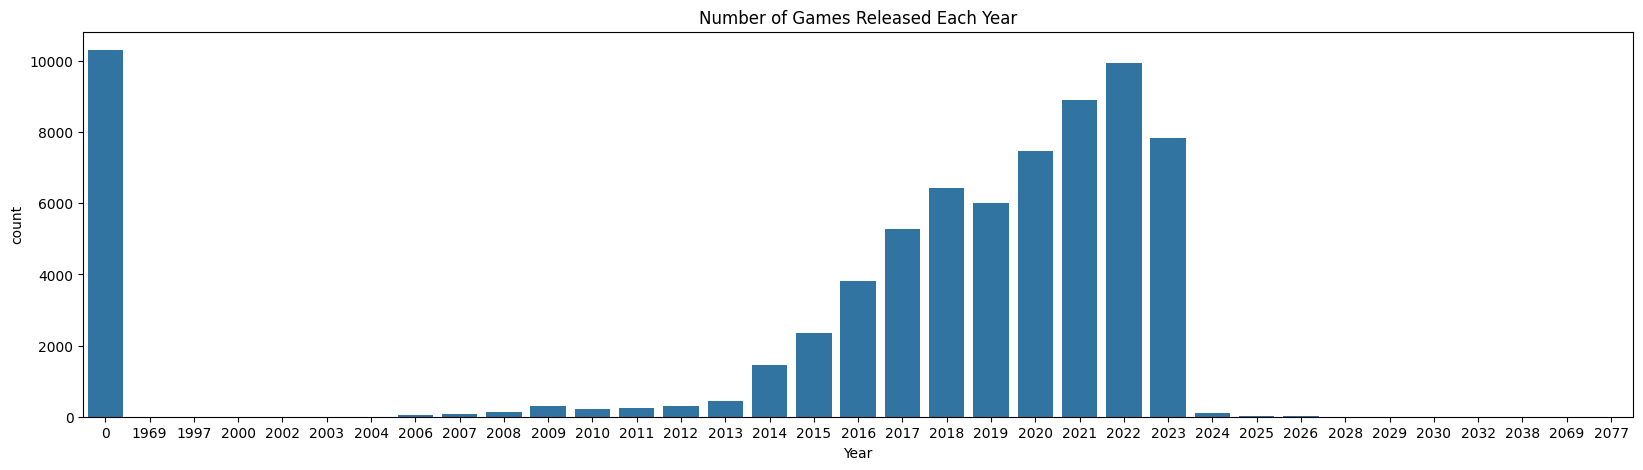

In [71]:
steam_data.pivot_table(index='Year', values='Original Price', aggfunc='mean')
steam_data.pivot_table(index='Year', values='Original Price', aggfunc='count')

plt.figure(figsize=(20, 5))
sns.countplot(data=steam_data, x='Year')
plt.title('Number of Games Released Each Year')

# 22. Identify if there is any correlation between the number of supported languages and the number of popular tags per game.

In [76]:
count_tags = steam_data['Popular Tags'].str.split(',').apply(len)
# {index: name for index, name in enumerate(steam_data.columns)}
steam_data.insert(18, 'Count Tags', count_tags)

In [80]:
steam_data[['Num Languages', 'Count Tags']].corr()

,Num Languages,Count Tags
Num Languages,1.000000,0.093118
Count Tags,0.093118,1.000000


# 23. How many games are developed and published by the same company?

In [88]:
steam_data['Developer'].value_counts(ascending=False)

Developer
Unknown                     221
Choice of Games             162
Creobit                     136
Laush Dmitriy Sergeevich    119
Boogygames Studios          106
                           ... 
Girls Dance studio            1
Team Shuriken                 1
Sandbank Studios Ltd          1
Vae Victis Games              1
Cubic Games Studio            1
Name: count, Length: 45354, dtype: int64

In [93]:
same_dev_pub = steam_data[steam_data['Developer'] == steam_data['Publisher']]
num_same_dev_pub = len(same_dev_pub)
same_dev_pub

,Title,Original Price,Discounted Price,Discounted Amount,Release Date,Year,Link,Game Description,Recent Reviews Summary,All Reviews Summary,...,Recent Reviews Count,All Reviews Number,Developer,Publisher,Supported Languages,Num Languages,Popular Tags,Count Tags,Game Features,Minimum Requirements
0,Baldur's Gate 3,29.99,29.99,0.0,2023-08-03,2023,https://store.steampowered.com/app/1086940/Bal...,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,Very Positive,...,96,"- 94% of the 188,617 user reviews for this gam...",Larian Studios,Larian Studios,"['English', 'French', 'German', 'Spanish - Spa...",13,"['RPG', 'Choices Matter', 'Character Customiza...",20,"['Single-player', 'Online Co-op', 'LAN Co-op',...",Requires a 64-bit processor and operating syst...
5,PUBG: BATTLEGROUNDS,0.00,0.00,0.0,2017-12-21,2017,https://store.steampowered.com/app/578080/PUBG...,Play PUBG: BATTLEGROUNDS for free. Land on str...,Mixed,Mixed,...,64,"- 57% of the 2,209,987 user reviews for this g...","KRAFTON, Inc.","KRAFTON, Inc.","['English', 'Korean', 'Simplified Chinese', 'F...",17,"['Survival', 'Shooter', 'Battle Royale', 'Mult...",20,"['Online PvP', 'Stats', 'Remote Play on Phone'...",Requires a 64-bit processor and operating syst...
7,Cyberpunk 2077,29.99,14.99,15.0,2020-12-09,2020,https://store.steampowered.com/app/1091500/Cyb...,"Cyberpunk 2077 is an open-world, action-advent...",Very Positive,Very Positive,...,90,"- 80% of the 552,224 user reviews for this gam...",CD PROJEKT RED,CD PROJEKT RED,"['English', 'French', 'Italian', 'German', 'Sp...",18,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",20,"['Single-player', 'Steam Achievements', 'Steam...",Requires a 64-bit processor and operating syst...
8,Rust,19.99,19.99,0.0,2018-02-08,2018,https://store.steampowered.com/app/252490/Rust...,The only aim in Rust is to survive. Everything...,Very Positive,Very Positive,...,86,"- 87% of the 781,742 user reviews for this gam...",Facepunch Studios,Facepunch Studios,"['English', 'French', 'Italian', 'German', 'Sp...",25,"['Survival', 'Crafting', 'Multiplayer', 'Open ...",20,"['MMO', 'Online PvP', 'Online Co-op', 'Cross-P...",Requires a 64-bit processor and operating syst...
12,Dead by Daylight,12.59,12.59,0.0,2016-06-14,2016,https://store.steampowered.com/app/381210/Dead...,Dead by Daylight is a multiplayer (4vs1) horro...,Very Positive,Very Positive,...,82,"- 80% of the 489,916 user reviews for this gam...",Behaviour Interactive Inc.,Behaviour Interactive Inc.,"['English', 'French', 'Italian', 'German', 'Sp...",15,"['Horror', 'Survival Horror', 'Multiplayer', '...",20,"['Online PvP', 'Online Co-op', 'Cross-Platform...",Requires a 64-bit processor and operating syst...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71693,Rooted,0.00,0.00,0.0,NaT,0,https://store.steampowered.com/app/1940080/Roo...,"In this solo and multiplayer survival game, ex...",No reviews,No reviews,...,0,No reviews,Headlight Studio,Headlight Studio,"['English', 'French', 'German', 'Simplified Ch...",8,"['Survival Horror', 'Crafting', 'Base Building...",20,"['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...
71694,Sunkenland,0.00,0.00,0.0,2023-08-25,2023,https://store.steampowered.com/app/2080690/Sun...,Get ready for a Waterworld-themed survival gam...,No reviews,No reviews,...,0,No reviews,Vector3 Studio,Vector3 Studio,"['English', 'Simplified Chinese', 'French', 'G...",9,"['Early Access', 'Open World Survival Craft', ...",20,"['Single-player', 'Online Co-op', 'LAN Co-op',...",OS: | Windows 7 | Processor: | Intel Dual-Co...
71695,The Front,0.00,0.00,0.0,NaT,0,https://store.steampowered.com/app/2285150/The...,The Front is a survival-open-world-crafting (S...,No reviews,No reviews,...,0,No reviews,Samar Studio,Samar Studio,"['English', 'French', 'German', 'Russian', 'Ja...",10,"['Early Access', 'Survival', 'Building', 'Sand...",20,"['Single-player', 'MMO', 'Online PvP', 'L

# 24. Clean the 'Recent Reviews Number' and 'All Reviews Number' columns to convert them into integers.

In [94]:
steam_data['Recent Reviews Number'] = steam_data['Recent Reviews Number'].str.replace('No recent reviews', '0')
steam_data['Recent Reviews Number'] = steam_data['Recent Reviews Number'].str.replace(',', '').astype(int)

steam_data['All Reviews Number'] = steam_data['All Reviews Number'].str.replace('No reviews', '0')
steam_data['All Reviews Number'] = steam_data['All Reviews Number'].str.replace(',', '').astype(int)

ValueError: invalid literal for int() with base 10: '- 96% of the 128900 user reviews in the last 30 days are positive.'

# 26. Find out how many games have been reviewed more positively over time (where recent review summary is better than all review summary).

In [96]:
# Define a function to convert review summaries to numerical scores
def review_to_score(review):
    if review == 'Overwhelmingly Positive':
        return 5
    elif review == 'Very Positive':
        return 4
    elif review == 'Mostly Positive':
        return 3
    elif review == 'Mixed':
        return 2
    elif review == 'Mostly Negative':
        return 1
    elif review == 'Very Negative':
        return 0
    else:
        return None

# Convert review summaries to scores
steam_data['Recent Reviews Score'] = steam_data['Recent Reviews Summary'].apply(review_to_score)
steam_data['All Reviews Score'] = steam_data['All Reviews Summary'].apply(review_to_score)

# Create a new column that indicates whether the recent review summary is better than the all review summary
steam_data['Recent Better Than All'] = steam_data['Recent Reviews Score'] > steam_data['All Reviews Score']

# Count the number of games where the recent review summary is better than the all review summary
num_games_recent_better = steam_data['Recent Better Than All'].sum()

num_games_recent_better

466

# 27. List games that are available in more than 5 languages but have less than 5 popular tags.

In [97]:
steam_data

,Title,Original Price,Discounted Price,Discounted Amount,Release Date,Year,Link,Game Description,Recent Reviews Summary,All Reviews Summary,...,Publisher,Supported Languages,Num Languages,Popular Tags,Count Tags,Game Features,Minimum Requirements,Recent Reviews Score,All Reviews Score,Recent Better Than All
0,Baldur's Gate 3,29.99,29.99,0.00,2023-08-03,2023,https://store.steampowered.com/app/1086940/Bal...,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,Very Positive,...,Larian Studios,"['English', 'French', 'German', 'Spanish - Spa...",13,"['RPG', 'Choices Matter', 'Character Customiza...",20,"['Single-player', 'Online Co-op', 'LAN Co-op',...",Requires a 64-bit processor and operating syst...,5.0,4.0,True
1,Counter-Strike: Global Offensive,14.99,14.99,0.00,2012-08-21,2012,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,Very Positive,...,Valve,"['English', 'Czech', 'Danish', 'Dutch', 'Finni...",28,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",20,"['Steam Achievements', 'Full controller suppor...",OS: | Windows® 7/Vista/XP | Processor: | Int...,4.0,4.0,False
2,Apex Legends™,0.00,0.00,0.00,2020-11-04,2020,https://store.steampowered.com/app/1172470/Ape...,"Apex Legends is the award-winning, free-to-pla...",Mixed,Very Positive,...,Electronic Arts,"['English', 'French', 'Italian', 'German', 'Sp...",14,"['Free to Play', 'Multiplayer', 'Battle Royale...",20,"['Online PvP', 'Online Co-op', 'Steam Achievem...",Requires a 64-bit processor and operating syst...,2.0,4.0,False
3,Forza Horizon 5,34.78,17.39,17.39,2021-11-08,2021,https://store.steampowered.com/app/1551360/For...,Your Ultimate Horizon Adventure awaits! Explor...,Very Positive,Very Positive,...,Xbox Game Studios,"['English', 'French', 'Italian', 'German', 'Sp...",16,"['Racing', 'Open World', 'Driving', 'Multiplay...",20,"['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...,4.0,4.0,False
4,Call of Duty®,0.00,0.00,0.00,2022-10-27,2022,https://store.steampowered.com/app/1938090/Cal...,"Welcome to Call of Duty® HQ, the home of Call ...",Mixed,Mixed,...,Activision,"['English', 'French', 'Italian', 'German', 'Sp...",14,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...",20,"['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...,2.0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71695,The Front,0.00,0.00,0.00,NaT,0,https://store.steampowered.com/app/2285150/The...,The Front is a survival-open-world-crafting (S...,No reviews,No reviews,...,Samar Studio,"['English', 'French', 'German', 'Russian', 'Ja...",10,"['Early Access', 'Survival', 'Building', 'Sand...",20,"['Single-player', 'MMO', 'Online PvP', 'LAN Pv...",OS: | Requires a 64-bit processor and operati...,NaN,NaN,False
71696,The Bornless,0.00,0.00,0.00,NaT,0,https://store.steampowered.com/app/2411280/The...,"Welcome to The Bornless, an action horror FPS....",No reviews,No reviews,...,Cathedral Studios,"['English', 'French', 'Italian', 'German', 'Sp...",15,"['Early Access', 'Horror', 'FPS', 'Shooter', '...",20,"['Single-player', 'Online PvP', 'Online Co-op'...",OS: | Windows 10 or higher | Processor: | In...,NaN,NaN,False
71697,Winter Memories,0.00,0.00,0.00,NaT,0,https://store.steampowered.com/app/2495450/Win...,After the unforgettable summer memories you’ve...,No reviews,No reviews,...,Kagura Games,"['English', 'Japanese', 'Simplified Chinese']",3,"['Casual', 'RPG', 'Simulation', 'Sexual Conten...",15,['Single-player'],OS: | Windows® 7/8/8.1/10/11 | Processor: | ...,NaN,NaN,False
71698,Call of Duty®: Modern Warfare® III,69.99,69.99,0.00,NaT,0,https://store.steampowered.com/app/2519060/Cal...,In the direct sequel to the record-breaking Ca...,No reviews,No reviews,...,Activision,"['English', 'French', 'Italian', 'German', 'Sp...",15,"['Action', 'FPS', 'Shooter', 'First-Person', '...",17,"['S

In [102]:
steam_data[(steam_data['Num Languages'] > 5) & (steam_data['Count Tags'] < 5)]

,Title,Original Price,Discounted Price,Discounted Amount,Release Date,Year,Link,Game Description,Recent Reviews Summary,All Reviews Summary,...,Publisher,Supported Languages,Num Languages,Popular Tags,Count Tags,Game Features,Minimum Requirements,Recent Reviews Score,All Reviews Score,Recent Better Than All
2081,eSail Sailing Simulator,16.49,16.49,0.0,2019-03-26,2019,https://store.steampowered.com/app/794860/eSai...,eSail Sailing Simulator is an authentic yacht ...,Very Positive,No reviews,...,Unknown,"['English', 'French', 'Russian', 'German', 'It...",9,"['Simulation', 'Sports', 'Racing', 'Sailing']",4,"['Single-player', 'Online PvP', 'Cross-Platfor...",Requires a 64-bit processor and operating syst...,4.0,NaN,False
3352,Home Design 3D,6.99,6.99,0.0,2015-11-20,2015,https://store.steampowered.com/app/420000/Home...,Home Design 3D is the reference interior desig...,Mostly Positive,Mostly Positive,...,Anuman Interactive / Microids,"['English', 'French', 'Italian', 'German', 'Sp...",16,"['Simulation', 'Design & Illustration', 'Build...",4,['Single-player'],OS: | Windows/7/8/10 | Processor: | Intel® C...,3.0,3.0,False
3610,AccuRC 2,24.99,24.99,0.0,2017-07-12,2017,https://store.steampowered.com/app/495290/Accu...,AccuRC is an RC simulator mainly for helicopte...,Very Positive,No reviews,...,trasnatech,"['English', 'French', 'Italian', 'German', 'Sp...",13,"['Simulation', 'Racing', 'Sports', 'Flight']",4,"['Single-player', 'Online PvP', 'Shared/Split ...",OS: | Windows 8 or newer | Processor: | Inte...,4.0,NaN,False
6202,Virtual Villagers Origins 2,0.00,0.00,0.0,2018-10-26,2018,https://store.steampowered.com/app/949050/Virt...,"Craft, build, farm, breed and solve puzzles in...",Mixed,No reviews,...,Last Day Of Work,"['English', 'French', 'Italian', 'German', 'Sp...",11,"['Simulation', 'Free to Play']",2,"['Single-player', 'In-App Purchases']",OS: | Windows Vista SP1+ | Memory: | 512 MB ...,2.0,NaN,False
6229,Acron: Attack of the Squirrels!,10.49,10.49,0.0,2019-08-29,2019,https://store.steampowered.com/app/1094870/Acr...,WARNING: This is a highly addictive VR game an...,Very Positive,No reviews,...,Resolution Games,"['English', 'French', 'Italian', 'German', 'Sp...",11,"['Action', 'Asymmetric VR', 'VR', 'Multiplayer']",4,"['Online PvP', 'Online Co-op', 'Cross-Platform...",OS: | Windows 10 | Processor: | Intel Core i...,4.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69474,Mortido,0.00,0.00,0.0,NaT,0,https://store.steampowered.com/app/1058290/Mor...,"This is an action-adventure game, the story ab...",No reviews,No reviews,...,BigGame Publishing,"['English', 'French', 'Italian', 'German', 'Si...",7,"['Action', 'Adventure', 'Indie']",3,"['Single-player', 'Steam Achievements', 'Stats...","OS: | Windows 8.1 64 Bit, Windows 8 64 Bit, W...",NaN,NaN,False
69482,Build a Bridge!,0.00,0.00,0.0,NaT,0,https://store.steampowered.com/app/694110/Buil...,Bridge building puzzle game that will test you...,No reviews,No reviews,...,BoomBit,"['English', 'French', 'Italian', 'German', 'Sp...",12,['Simulation'],1,"['Single-player', 'Steam Achievements', 'Full ...",OS: | Windows 7 | Processor: | 1ghz | Memory...,NaN,NaN,False
69671,Halo 2 Anniversary MP Mod Tools - MCC,0.00,0.00,0.0,NaT,0,https://store.steampowered.com/app/1695790/Hal...,No description available,No reviews,No reviews,...,Unknown,"['English', 'French', 'Italian', 'German', 'Sp...",12,['Action'],1,"['Single-player', 'Online PvP', 'LAN PvP', 'On...",Unknown requirements,NaN,NaN,False
69768,Cubion,0.00,0.00,0.0,2017-11-05,2017,https://store.steampowered.com/app/710550/Cubi...,"Symbiosis of styles ""shoot'em up"" and ""flappy ...",7 user reviews,No reviews,...,BBit,"['English', 'French', 'Italian', 'German', 'Sp...",27,"['Indie', 'Free to Play']",2,"['Single-player', 'Steam Achievements']","OS: | Windows XP, 7, Vista, 8, 8.1, 10 | Proc...",NaN,NaN,False


# 28. Identify the most common minimum OS requirement for the games.

In [104]:
# Define a regular expression pattern for OS requirements
os_pattern = r'OS:\s*(.*?)\|'

# Extract OS requirements using the defined pattern
steam_data['OS Requirements'] = steam_data['Minimum Requirements'].str.extract(os_pattern, expand=False)

# Count the occurrences of each OS
os_counts = steam_data['OS Requirements'].value_counts()

# Get the most common OS
most_common_os = os_counts.idxmax()

most_common_os

''

# 29. Create a column that indicates whether a game is available in 'Chinese'.

In [113]:
def contains_chinese(supported_language):
  if 'Chinese' in supported_language: return True
  else: return False

chinese_language = steam_data['Supported Languages'].apply(contains_chinese)
steam_data.insert(16, 'Chinese Language', chinese_language)
# steam_data[steam_data['Supported Languages'].str.contains('Chinese')]

In [115]:
steam_data

,Title,Original Price,Discounted Price,Discounted Amount,Release Date,Year,Link,Game Description,Recent Reviews Summary,All Reviews Summary,...,Chinese Language,Num Languages,Popular Tags,Count Tags,Game Features,Minimum Requirements,Recent Reviews Score,All Reviews Score,Recent Better Than All,OS Requirements
0,Baldur's Gate 3,29.99,29.99,0.00,2023-08-03,2023,https://store.steampowered.com/app/1086940/Bal...,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,Very Positive,...,True,13,"['RPG', 'Choices Matter', 'Character Customiza...",20,"['Single-player', 'Online Co-op', 'LAN Co-op',...",Requires a 64-bit processor and operating syst...,5.0,4.0,True,
1,Counter-Strike: Global Offensive,14.99,14.99,0.00,2012-08-21,2012,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,Very Positive,...,True,28,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",20,"['Steam Achievements', 'Full controller suppor...",OS: | Windows® 7/Vista/XP | Processor: | Int...,4.0,4.0,False,
2,Apex Legends™,0.00,0.00,0.00,2020-11-04,2020,https://store.steampowered.com/app/1172470/Ape...,"Apex Legends is the award-winning, free-to-pla...",Mixed,Very Positive,...,True,14,"['Free to Play', 'Multiplayer', 'Battle Royale...",20,"['Online PvP', 'Online Co-op', 'Steam Achievem...",Requires a 64-bit processor and operating syst...,2.0,4.0,False,
3,Forza Horizon 5,34.78,17.39,17.39,2021-11-08,2021,https://store.steampowered.com/app/1551360/For...,Your Ultimate Horizon Adventure awaits! Explor...,Very Positive,Very Positive,...,True,16,"['Racing', 'Open World', 'Driving', 'Multiplay...",20,"['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...,4.0,4.0,False,
4,Call of Duty®,0.00,0.00,0.00,2022-10-27,2022,https://store.steampowered.com/app/1938090/Cal...,"Welcome to Call of Duty® HQ, the home of Call ...",Mixed,Mixed,...,True,14,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...",20,"['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...,2.0,2.0,False,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71695,The Front,0.00,0.00,0.00,NaT,0,https://store.steampowered.com/app/2285150/The...,The Front is a survival-open-world-crafting (S...,No reviews,No reviews,...,True,10,"['Early Access', 'Survival', 'Building', 'Sand...",20,"['Single-player', 'MMO', 'Online PvP', 'LAN Pv...",OS: | Requires a 64-bit processor and operati...,NaN,NaN,False,
71696,The Bornless,0.00,0.00,0.00,NaT,0,https://store.steampowered.com/app/2411280/The...,"Welcome to The Bornless, an action horror FPS....",No reviews,No reviews,...,True,15,"['Early Access', 'Horror', 'FPS', 'Shooter', '...",20,"['Single-player', 'Online PvP', 'Online Co-op'...",OS: | Windows 10 or higher | Processor: | In...,NaN,NaN,False,
71697,Winter Memories,0.00,0.00,0.00,NaT,0,https://store.steampowered.com/app/2495450/Win...,After the unforgettable summer memories you’ve...,No reviews,No reviews,...,True,3,"['Casual', 'RPG', 'Simulation', 'Sexual Conten...",15,['Single-player'],OS: | Windows® 7/8/8.1/10/11 | Processor: | ...,NaN,NaN,False,
71698,Call of Duty®: Modern Warfare® III,69.99,69.99,0.00,NaT,0,https://store.steampowered.com/app/2519060/Cal...,In the direct sequel to the record-breaking Ca...,No reviews,No reviews,...,True,15,"['Action', 'FPS', 'Shooter', 'First-Person', '...",17,"['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...,NaN,NaN,False,


# 30. For each game, count how many 'Game Features' it has and find the average number of features across all games.

In [124]:
game_features_count = steam_data['Game Features'].str.split(',').explode().apply(len)
game_features_count.mean()

19.533437967593883

In [121]:
steam_data

,Title,Original Price,Discounted Price,Discounted Amount,Release Date,Year,Link,Game Description,Recent Reviews Summary,All Reviews Summary,...,Chinese Language,Num Languages,Popular Tags,Count Tags,Game Features,Minimum Requirements,Recent Reviews Score,All Reviews Score,Recent Better Than All,OS Requirements
0,Baldur's Gate 3,29.99,29.99,0.00,2023-08-03,2023,https://store.steampowered.com/app/1086940/Bal...,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,Very Positive,...,True,13,"['RPG', 'Choices Matter', 'Character Customiza...",20,"['Single-player', 'Online Co-op', 'LAN Co-op',...",Requires a 64-bit processor and operating syst...,5.0,4.0,True,
1,Counter-Strike: Global Offensive,14.99,14.99,0.00,2012-08-21,2012,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,Very Positive,...,True,28,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",20,"['Steam Achievements', 'Full controller suppor...",OS: | Windows® 7/Vista/XP | Processor: | Int...,4.0,4.0,False,
2,Apex Legends™,0.00,0.00,0.00,2020-11-04,2020,https://store.steampowered.com/app/1172470/Ape...,"Apex Legends is the award-winning, free-to-pla...",Mixed,Very Positive,...,True,14,"['Free to Play', 'Multiplayer', 'Battle Royale...",20,"['Online PvP', 'Online Co-op', 'Steam Achievem...",Requires a 64-bit processor and operating syst...,2.0,4.0,False,
3,Forza Horizon 5,34.78,17.39,17.39,2021-11-08,2021,https://store.steampowered.com/app/1551360/For...,Your Ultimate Horizon Adventure awaits! Explor...,Very Positive,Very Positive,...,True,16,"['Racing', 'Open World', 'Driving', 'Multiplay...",20,"['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...,4.0,4.0,False,
4,Call of Duty®,0.00,0.00,0.00,2022-10-27,2022,https://store.steampowered.com/app/1938090/Cal...,"Welcome to Call of Duty® HQ, the home of Call ...",Mixed,Mixed,...,True,14,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...",20,"['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...,2.0,2.0,False,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71695,The Front,0.00,0.00,0.00,NaT,0,https://store.steampowered.com/app/2285150/The...,The Front is a survival-open-world-crafting (S...,No reviews,No reviews,...,True,10,"['Early Access', 'Survival', 'Building', 'Sand...",20,"['Single-player', 'MMO', 'Online PvP', 'LAN Pv...",OS: | Requires a 64-bit processor and operati...,NaN,NaN,False,
71696,The Bornless,0.00,0.00,0.00,NaT,0,https://store.steampowered.com/app/2411280/The...,"Welcome to The Bornless, an action horror FPS....",No reviews,No reviews,...,True,15,"['Early Access', 'Horror', 'FPS', 'Shooter', '...",20,"['Single-player', 'Online PvP', 'Online Co-op'...",OS: | Windows 10 or higher | Processor: | In...,NaN,NaN,False,
71697,Winter Memories,0.00,0.00,0.00,NaT,0,https://store.steampowered.com/app/2495450/Win...,After the unforgettable summer memories you’ve...,No reviews,No reviews,...,True,3,"['Casual', 'RPG', 'Simulation', 'Sexual Conten...",15,['Single-player'],OS: | Windows® 7/8/8.1/10/11 | Processor: | ...,NaN,NaN,False,
71698,Call of Duty®: Modern Warfare® III,69.99,69.99,0.00,NaT,0,https://store.steampowered.com/app/2519060/Cal...,In the direct sequel to the record-breaking Ca...,No reviews,No reviews,...,True,15,"['Action', 'FPS', 'Shooter', 'First-Person', '...",17,"['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...,NaN,NaN,False,


In [122]:
{index: name for index, name in enumerate(steam_data.columns)}

{0: 'Title',
 1: 'Original Price',
 2: 'Discounted Price',
 3: 'Discounted Amount',
 4: 'Release Date',
 5: 'Year',
 6: 'Link',
 7: 'Game Description',
 8: 'Recent Reviews Summary',
 9: 'All Reviews Summary',
 10: 'Recent Reviews Number',
 11: 'Recent Reviews Count',
 12: 'All Reviews Number',
 13: 'Developer',
 14: 'Publisher',
 15: 'Supported Languages',
 16: 'Chinese Language',
 17: 'Num Languages',
 18: 'Popular Tags',
 19: 'Count Tags',
 20: 'Game Features',
 21: 'Minimum Requirements',
 22: 'Recent Reviews Score',
 23: 'All Reviews Score',
 24: 'Recent Better Than All',
 25: 'OS Requirements'}